## german credit data

### Wczytanie pakietów

In [549]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
pd.set_option("display.max_columns", 101) ## to pomoże nam przy metodzie head zobaczyć wszystkie kolumny
plt.rcParams["figure.figsize"] = (20,3)

### Eksploracja

In [550]:
df = pd.read_csv('credit-g.csv')


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,bad
5,no checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,none,4,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good
6,no checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,none,4,life insurance,53,none,own,1,skilled,1,none,yes,good
7,0<=X<200,36,existing paid,used car,6948,<100,1<=X<4,2,male single,none,2,car,35,none,rent,1,high qualif/self emp/mgmt,1,yes,yes,good
8,no checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,none,4,real estate,61,none,own,1,unskilled resident,1,none,yes,good
9,0<=X<200,30,critical/other existing credit,new car,5234,<100,unemployed,4,male mar/wid,none,2,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,bad


#### Przegląd danych w zbiorze


In [551]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [552]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [553]:
df.shape

(1000, 21)

In [762]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [956]:
print(df.dtypes.value_counts)
value_counts = pd.DataFrame(df.value_counts())
value_counts


<bound method IndexOpsMixin.value_counts of checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object>


0
checking_status duration credit_history                 purpose             credit_amount savings_status   employment installment_commitment personal_status    other_parties residence_since property_magnitude age other_payment_plans housing  existing_credits job                       num_dependents own_telephone foreign_worker class   
0<=X<200        6        all paid                       education           433           >=1000           <1         4                      female div/dep/mar none          2               life insurance     24  bank                rent     1                skilled                   2              none          yes            bad    1
no checking     10       existing paid                  new car             1364          <100             1<=X<4     2                      female div/dep/mar none          4               car                64  none                own      1                skilled                   1              yes           yes            good   1
                9        existing paid                  furniture/equipment 2301          100<=X<500       <1         2                      female div/dep/mar none          4               life insurance     22  none                rent     1                skilled                   1              none          yes            good   1
                                                        new car             2507          500<=X<1000      >=7        2                      male single        none          4               no known property  51  none                for free 1                unskilled resident        1              none          yes            good   1
                                                                            3577          100<=X<500       1<=X<4     1                      male single        guarantor     2               real estate        26  none                rent     1                skilled                   2              none          no             good   1
                                                        radio/tv            1478          <100             4<=X<7     4                      male single        none          2               car                22  none                own      1                skilled                   1              none          yes            bad    1
                                                                            2697          <100             1<=X<4     1                      male single        none          2               real estate        32  none                own      1                skilled                   2              none          yes            good   1
                                                                            2753          100<=X<500       >=7        3                      male single        co applicant  4               car                35  none                own      1                skilled                   1              yes           yes            good   1
                10       critical/other existing credit furniture/equipment 2069          no known savings 1<=X<4     2                      male mar/wid       none          1               car                26  none                own      2                skilled                   1              none          no             good   1
                                                                            2146          <100             <1         1                      female div/dep/mar none          3               real estate        23  none                rent     2                skilled                   1              none          yes            good   1
                                                        new car             1231          <100             >=7        3                      male single        none          4               real estate        32  none                own      2                unskilled resident   

#### Sprawdzenie udziału poszczególnych kategorii - zadanie samodzielne


<AxesSubplot:>

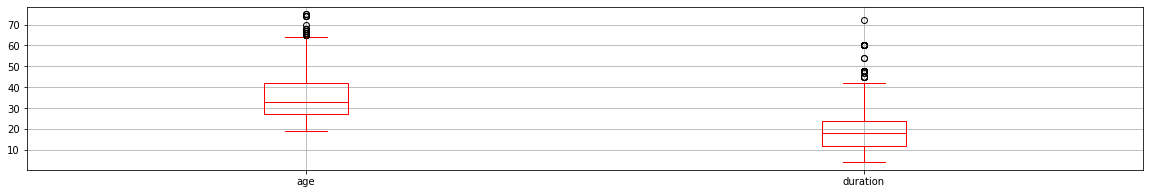

In [764]:
# 1. Pudełko dla 'age' i 'duration'

df.boxplot(column=['age','duration'], color='red')

array([[<AxesSubplot:title={'center':'credit_amount'}>]], dtype=object)

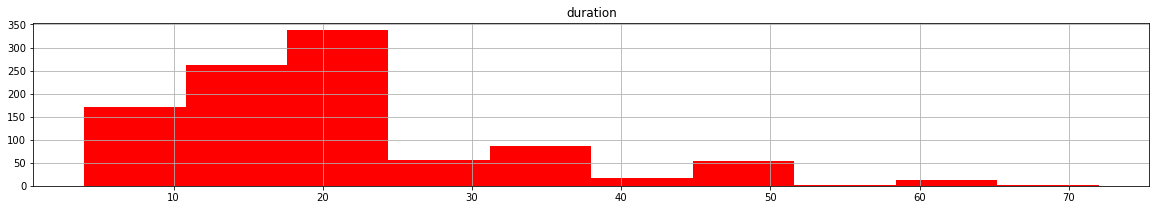

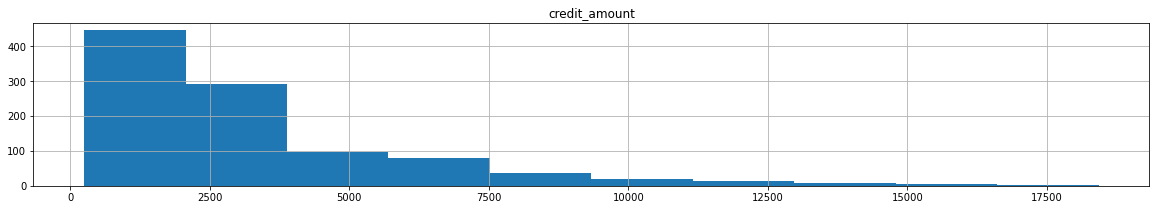

In [765]:
# 2. Histogram dla 'duration' i 'credit amount'

df.hist('duration', color='red')
df.hist('credit_amount')

#### Sprawdzenie braków danych

In [766]:
df.info()

print('Nie ma braku danych w kolumnach')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

#### Korelacja

In [767]:
corr = np.round(df.corr(), 3)


<AxesSubplot:>

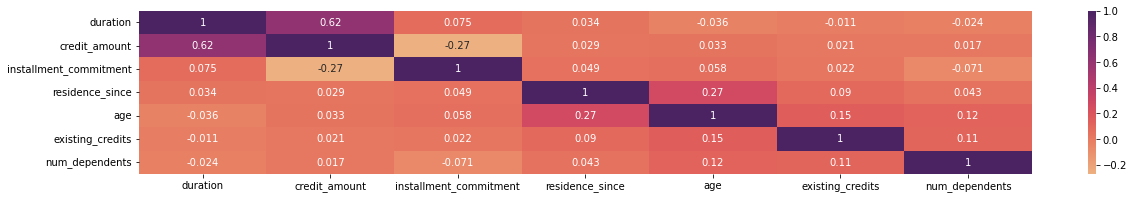

In [768]:
color_map = sns.color_palette("flare", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=color_map)

In [826]:
df1 = pd.get_dummies(df)


In [827]:
corr_2 = np.round(df1.corr(), 3)
corr_2 = pd.DataFrame(corr_2)
corr_2

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_100<=X<500,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,personal_status_female div/dep/mar,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,class_bad,class_good
duration,1.000,0.625,0.075,0.034,-0.036,-0.011,-0.024,0.089,0.022,-0.076,-0.063,0.034,-0.076,0.137,-0.070,0.118,0.164,-0.037,0.004,-0.063,-0.110,0.105,-0.044,-0.023,-0.072,0.145,0.052,-0.040,-0.047,-0.048,0.071,-0.032,0.080,-0.057,0.017,-0.005,-0.081,0.006,-0.084,0.122,0.030,-0.040,0.010,0.119,-0.057,0.213,-0.243,0.036,-0.068,0.066,0.189,-0.075,-0.064,0.148,0.055,-0.044,-0.181,-0.165,0.165,-0.138,0.138,0.215,-0.215
credit_amount,0.625,1.000,-0.271,0.029,0.033,0.021,0.017,0.120,-0.021,-0.101,-0.039,0.006,-0.042,0.114,-0.087,0.147,0.103,-0.069,-0.007,-0.034,-0.041,0.193,-0.173,-0.029,-0.070,0.252,0.014,-0.064,-0.036,-0.056,0.107,-0.037,0.054,-0.052,-0.010,0.086,-0.093,0.034,-0.138,0.152,0.079,-0.065,-0.004,0.076,-0.033,0.249,-0.248,0.039,-0.048,0.024,0.202,-0.117,-0.025,0.320,-0.093,-0.028,-0.162,-0.277,0.277,-0.050,0.050,0.155,-0.155
installment_commitment,0.075,-0.271,1.000,0.049,0.058,0.022,-0.071,-0.052,0.047,-0.042,0.025,0.030,0.041,-0.015,-0.021,-0.054,-0.025,0.019,0.042,-0.063,-0.046,-0.030,0.139,0.040,0.040,-0.095,-0.015,-0.023,-0.009,0.035,0.018,-0.070,-0.001,-0.034,0.133,-0.049,-0.086,-0.097,0.008,0.118,-0.013,-0.006,0.014,0.017,-0.021,0.045,-0.035,-0.016,-0.016,0.056,0.040,0.050,-0.091,0.043,0.043,-0.088,-0.057,-0.014,0.014,-0.090,0.090,0.072,-0.072
residence_since,0.034,0.029,0.049,1.000,0.266,0.090,0.043,-0.056,0.088,-0.064,0.002,0.028,0.088,-0.020,-0.081,0.001,-0.049,-0.018,0.041,-0.007,0.020,0.040,-0.090,0.027,0.013,0.107,0.018,0.033,-0.090,-0.002,0.081,-0.141,-0.031,-0.164,0.303,0.036,0.014,-0.038,-0.103,0.064,0.002,-0.028,0.021,-0.041,-0.024,0.188,-0.085,0.015,0.017,-0.054,0.227,-0.298,0.167,0.005,-0.001,-0.035,0.009,-0.095,0.095,-0.054,0.054,0.003,-0.003
age,-0.036,0.033,0.058,0.266,1.000,0.149,0.118,-0.078,-0.011,0.038,0.062,0.014,0.164,0.016,-0.156,-0.022,-0.002,-0.013,0.068,-0.128,0.075,0.042,-0.046,0.040,-0.007,0.051,-0.075,0.031,-0.044,0.032,0.078,-0.155,-0.084,-0.210,0.363,0.111,-0.162,0.062,-0.146,0.207,-0.018,-0.024,0.031,-0.143,-0.029,0.206,0.012,0.047,-0.035,-0.011,0.253,0.007,-0.213,0.128,-0.148,0.060,0.044,-0.145,0.145,-0.006,0.006,-0.091,0.091
existing_credits,-0.011,0.021,0.022,0.090,0.149,1.000,0.110,-0.053,-0.029,-0.040,0.094,-0.096,0.501,0.142,-0.540,0.112,0.085,-0.062,-0.011,-0.070,0.036,0.018,-0.031,0.071,-0.012,-0.005,-0.011,-0.062,0.034,0.036,-0.016,-0.073,0.037,-0.096,0.124,0.013,-0.094,-0.027,-0.033,0.118,-0.006,-0.025,0.023,0.011,-0.010,-0.013,0.009,0.042,-0.050,0.023,0.011,0.041,-0.058,-0.011,-0.001,0.060,-0.010,-0.066,0.066,-0.010,0.010,-0.046,0.046
num_dependents,-0.024,0.017,-0.071,0.043,0.118,0.110,1.000,-0.067,0.059,-0.00

In [828]:
df1["class_good"].sum(), df1['class_good'].count()

(700, 1000)

#### Wytypowanie zmiennych na podstawie korelacji i analizy zmiennych 0-1

In [885]:
cor_matrix = df1.corr()['class_good'].abs().sort_values(ascending=False)
cor_matrix[2:17]

checking_status_no checking                      0.322436
checking_status_<0                               0.258333
duration                                         0.214927
credit_history_critical/other existing credit    0.181713
savings_status_<100                              0.161007
credit_amount                                    0.154739
credit_history_no credits/all paid               0.144767
housing_own                                      0.134589
credit_history_all paid                          0.134448
savings_status_no known savings                  0.129238
property_magnitude_no known property             0.125750
checking_status_0<=X<200                         0.119581
property_magnitude_real estate                   0.119300
other_payment_plans_none                         0.113285
purpose_radio/tv                                 0.106922
Name: class_good, dtype: float64

### Przygotowanie zbioru
#### Podział zbioru na treningowy i testowy

In [889]:
from sklearn.model_selection import train_test_split

# wybralam zmienne skorelowane powyzej 10

X = df1[['checking_status_no checking','checking_status_<0','duration','credit_history_critical/other existing credit','savings_status_<100','credit_amount','credit_history_no credits/all paid','housing_own','credit_history_all paid','savings_status_no known savings','property_magnitude_no known property','checking_status_0<=X<200','property_magnitude_real estate','other_payment_plans_none','purpose_radio/tv']]
y = df1["class_good"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

#### Standaryzacja

In [909]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

#### Analiza głównych składowych

In [910]:
from sklearn.decomposition import PCA

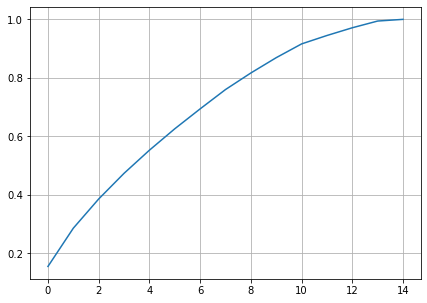

In [911]:
pca = PCA()


pca = PCA().fit(X_train_sc)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.gcf().set_size_inches(7, 5)

In [957]:
print(pca.explained_variance_ratio_)
print("\nWyniki po zaokragleniu do trzech miejsc po przecinku:\n")
print(np.round(pca.explained_variance_ratio_, 3))

[0.15534136 0.13078951 0.09979783 0.08775944 0.0790146  0.07320525
 0.06807662 0.0660513  0.05668487 0.05230954 0.04703879 0.02875675
 0.02643885 0.02298778 0.00574752]

Wyniki po zaokragleniu do trzech miejsc po przecinku:

[0.155 0.131 0.1   0.088 0.079 0.073 0.068 0.066 0.057 0.052 0.047 0.029
 0.026 0.023 0.006]


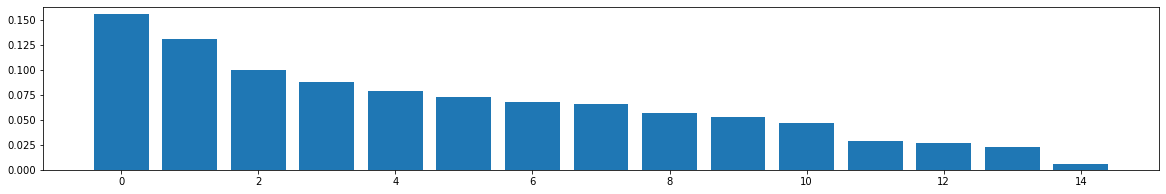

In [913]:
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
pass

In [958]:
# juz 8 zmiennych wyjasnia ponad 80% danych

n_pca_comp = 8
X_pca_train = pca.transform(X_train_sc)[:, :n_pca_comp]
X_pca_train

array([[ 2.64543251, -2.30171837, -1.30907781, ...,  1.33851959,
         0.37978594,  0.56032194],
       [-0.45453705, -0.62202763,  0.62536606, ...,  1.36750839,
         0.58245223,  1.91166403],
       [-0.69899033, -1.80130635, -1.08120928, ..., -0.82494942,
        -1.29813007, -0.88959312],
       ...,
       [ 0.47958989,  1.09205074, -0.25522482, ...,  2.67287715,
        -1.06132352,  0.51541047],
       [ 1.08876575, -1.69222142, -1.01464326, ..., -0.95385046,
         0.30996803,  0.31594945],
       [ 1.38681787,  1.51529533,  0.10494221, ..., -1.62485545,
        -1.06562229,  2.78953063]])

In [959]:
X_pca_test = pca.transform(X_test_sc)[:, :n_pca_comp]
X_pca_test

array([[-1.16102028,  2.11600863, -0.6300141 , ..., -0.84484323,
         0.46494809, -0.35130953],
       [ 2.23308406,  2.09828805, -1.15605574, ...,  1.60524977,
        -0.79624599, -0.6892144 ],
       [-0.11622105,  0.13640624, -1.99475438, ...,  1.07008852,
        -0.23071361, -1.28770036],
       ...,
       [ 0.25015635,  0.05745572, -1.30047037, ...,  0.53113919,
         1.32839169, -0.06612222],
       [-2.2187117 , -0.49971996,  0.34242114, ...,  1.9428123 ,
         0.63049984,  0.70316686],
       [-1.7980913 , -0.13157232, -0.45385715, ...,  0.95283093,
         0.97903004,  1.07345034]])

### Estymacja modelu klasyfikacyjnego

In [960]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [961]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_sc, y_train)


DecisionTreeClassifier()

[Text(749.681882022472, 159.19714285714286, 'X[0] <= 0.222\ngini = 0.423\nsamples = 700\nvalue = [213, 487]'),
 Text(554.7345505617978, 151.43142857142857, 'X[2] <= 0.922\ngini = 0.489\nsamples = 426\nvalue = [181, 245]'),
 Text(324.19382022471916, 143.6657142857143, 'X[8] <= 2.1\ngini = 0.467\nsamples = 347\nvalue = [129, 218]'),
 Text(124.87078651685394, 135.9, 'X[5] <= 1.804\ngini = 0.452\nsamples = 324\nvalue = [112, 212]'),
 Text(116.5112359550562, 128.13428571428574, 'X[2] <= -1.122\ngini = 0.442\nsamples = 316\nvalue = [104, 212]'),
 Text(16.719101123595507, 120.36857142857144, 'X[5] <= -0.099\ngini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(8.359550561797754, 112.60285714285715, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(25.07865168539326, 112.60285714285715, 'X[5] <= 0.101\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(16.719101123595507, 104.83714285714287, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(33.438202247191015, 104.83714285714287, 'gini = 0.0

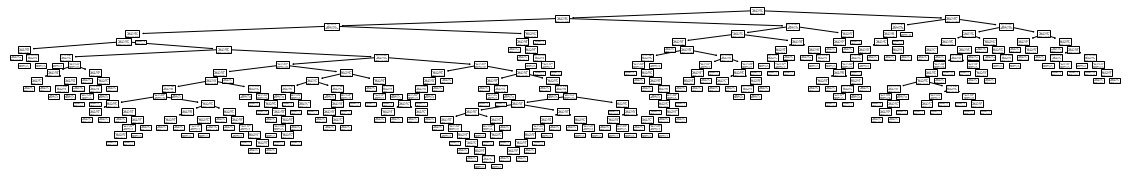

In [962]:
plot_tree(tree_clf)

In [963]:
tree_pca = DecisionTreeClassifier()
tree_pca = tree_pca.fit(X_pca_train, y_train)


[Text(600.1132075471698, 151.43142857142857, 'X[0] <= 0.312\ngini = 0.423\nsamples = 700\nvalue = [213, 487]'),
 Text(281.63207547169816, 128.13428571428574, 'X[1] <= -0.494\ngini = 0.305\nsamples = 447\nvalue = [84, 363]'),
 Text(94.75471698113208, 104.83714285714287, 'X[0] <= -1.338\ngini = 0.433\nsamples = 161\nvalue = [51, 110]'),
 Text(42.113207547169814, 81.54, 'X[0] <= -2.067\ngini = 0.059\nsamples = 33\nvalue = [1, 32]'),
 Text(21.056603773584907, 58.24285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(63.16981132075472, 58.24285714285715, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(147.39622641509436, 81.54, 'X[0] <= -0.107\ngini = 0.476\nsamples = 128\nvalue = [50, 78]'),
 Text(105.28301886792454, 58.24285714285715, 'X[0] <= -0.165\ngini = 0.494\nsamples = 99\nvalue = [44, 55]'),
 Text(84.22641509433963, 34.945714285714274, 'X[5] <= -0.224\ngini = 0.488\nsamples = 95\nvalue = [40, 55]'),
 Text(63.16981132075472, 11.648571428571444, '\n  (...)  \n'),
 Text

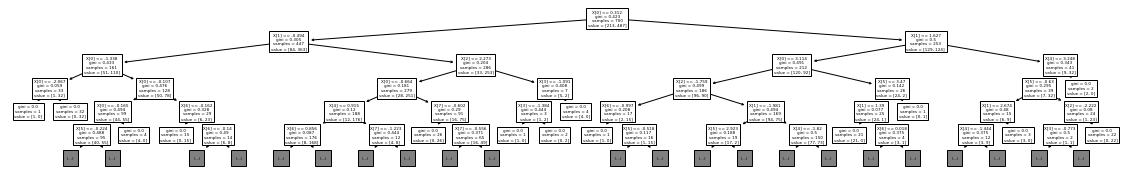

In [964]:
plot_tree(tree_pca, max_depth=5)

### Ocena jakości modelu klasyfikacyjnego

In [965]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [969]:
# dla PCA

y_pred = tree_pca.predict(X_pca_test)
acc_score_pca = accuracy_score(y_test, y_pred)
print('PCA - Confusion matrix: \n', confusion_matrix(y_test, y_pred),'\n')
print('PCA - Classification_report: \n', classification_report(y_test, y_pred),'\n')
print(f'PCA - Accuracy score: \n{acc_score_pca}')

PCA - Confusion matrix: 
 [[ 41  46]
 [ 40 173]] 

PCA - Classification_report: 
               precision    recall  f1-score   support

           0       0.51      0.47      0.49        87
           1       0.79      0.81      0.80       213

    accuracy                           0.71       300
   macro avg       0.65      0.64      0.64       300
weighted avg       0.71      0.71      0.71       300
 

PCA - Accuracy score: 
0.7133333333333334


In [970]:
# dla zmiennych wystandaryzowanych

y_pred = tree_clf.predict(X_test_sc)
acc_score = accuracy_score(y_test, y_pred)
print('Zmienne wystandar. - Confusion matrix: \n',confusion_matrix(y_test, y_pred),'\n')
print('Zmienne wystandar. - Classification_report: \n',classification_report(y_test, y_pred),'\n')
print(f'Zmienne wystandar. - Accuracy score:\n{acc_score}')

Zmienne wystandar. - Confusion matrix: 
 [[ 33  54]
 [ 61 152]] 

Zmienne wystandar. - Classification_report: 
               precision    recall  f1-score   support

           0       0.35      0.38      0.36        87
           1       0.74      0.71      0.73       213

    accuracy                           0.62       300
   macro avg       0.54      0.55      0.55       300
weighted avg       0.63      0.62      0.62       300
 

Zmienne wystandar. - Accuracy score:
0.6166666666666667
